In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import PCA #import thư viện PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep=",", encoding="utf-8")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
null_row= df.isnull().any(axis=1).sum()
null_row

np.int64(24)

In [ ]:
df[df["Income"].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,5/11/2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,1/1/2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11/7/2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#tạo bảng df_copy
df_copy = df.copy()
df_copy

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df_copy.dropna(inplace=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [ ]:
df_copy.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,8/5/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
#Đổi cột "Dt_Customer" sang dạng dateime định dạng mm/dd/yyyy
df_copy["Dt_Customer"]= pd.to_datetime(df_copy["Dt_Customer"],format='mixed', dayfirst=True, errors='coerce')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [ ]:
df_copy.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
#Tạo cột "Dt_Customer_1"
df_copy["Dt_Customer_1"] = df_copy["Dt_Customer"].dt.strftime("%m/%d/%Y")

In [ ]:
df_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_1
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,09/04/2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,03/08/2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,08/21/2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,02/10/2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,01/19/2014


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [ ]:
#Đổi định dạng cột Dt_Customer_1 sang date time
df_copy["Dt_Customer_1"] = pd.to_datetime(df_copy["Dt_Customer_1"],format="%m/%d/%Y")

In [ ]:
#Xóa cột ["Dt_Customer_1"]
df_copy =df_copy.drop(["Dt_Customer_1"], axis=1)

In [ ]:
#Tìm ngày xa nhất và ngày gần nhất
print("Newest_day:",df_copy["Dt_Customer"].max().date())
print("Oldest_day:",df_copy["Dt_Customer"].min().date())

Newest_day: 2014-06-29
Oldest_day: 2012-07-30


In [ ]:
#Tạo cột Customer_For: tính số ngày khách hàng đã là khách của công ty
dates= df_copy["Dt_Customer"]
d1 = max(dates)
df_copy["Customer_For"] = (d1-dates).dt.days
df_copy["Customer_For"]


,Customer_For
0,663
1,113
2,312
3,139
4,161
...,...
2235,381
2236,19
2237,155
2238,156


In [ ]:
#Đếm số lượng tình trạng hôn nhân
df_copy["Marital_Status"].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [ ]:
#Đếm số lượng học vấn
df_copy["Education"].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [ ]:
#Tạo cột tuổi
now = datetime.now()
year = now.year
print(year)
df_copy["Age"]=year-df_copy["Year_Birth"]
df_copy["Age"]

2025


,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


In [ ]:
#Tính tổng số tiền mà khách hàng đã bỏ tiền ra mua: rượu, hoa quả, thịt, cá, đồ ngọt, vàng
df_copy["Spent"] = df_copy["MntWines"]+ df_copy["MntFruits"]+ df_copy["MntMeatProducts"]+ df_copy["MntFishProducts"]+ df_copy["MntSweetProducts"]+ df_copy["MntGoldProds"]
df_copy["Spent"]

,Spent
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [ ]:
#Tạo cột Living_With và thay đổi tên.
df_copy["Living_With"]=df_copy["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df_copy["Living_With"]

,Living_With
0,Alone
1,Alone
2,Partner
3,Partner
4,Partner
...,...
2235,Partner
2236,Partner
2237,Alone
2238,Partner


In [ ]:
#Tạo cột children = Kidhome + Teenhome
df_copy["Children"]= df_copy["Kidhome"] + df_copy["Teenhome"]
df_copy["Children"]

,Children
0,0
1,2
2,0
3,1
4,1
...,...
2235,1
2236,3
2237,0
2238,1


In [ ]:
#Tạo cột FamilySize
df_copy["Family_Size"] = df_copy["Living_With"].replace({"Alone": 1, "Partner":2})+ df_copy["Children"]
df_copy["Family_Size"]

/tmp/ipython-input-26-2868122189.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["Family_Size"] = df_copy["Living_With"].replace({"Alone": 1, "Partner":2})+ df_copy["Children"]


,Family_Size
0,1
1,3
2,2
3,3
4,3
...,...
2235,3
2236,5
2237,1
2238,3


In [ ]:
#Tạo cột Is_Parent. Mục đích xem khách hàng có phải là cha mẹ ko. Nếu Children >0 thì là cha mẹ, =0 thì không phải cha me
df_copy["Is_Parent"] = np.where(df_copy["Children"] > 0, 1, 0)
df_copy["Is_Parent"]

,Is_Parent
0,0
1,1
2,0
3,1
4,1
...,...
2235,1
2236,1
2237,0
2238,1


In [ ]:
#Tạo cột Education và thay đổi tên chỉ còn 3 loại: Undergraduate, Graduate, Postgraduate
df_copy["Education"]=df_copy["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df_copy["Education"]

,Education
0,Graduate
1,Graduate
2,Graduate
3,Graduate
4,Postgraduate
...,...
2235,Graduate
2236,Postgraduate
2237,Graduate
2238,Postgraduate


In [ ]:
#Rename các cột cho gọn
df_copy=df_copy.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
df_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,663,68,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,113,71,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,312,60,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,139,41,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,161,44,422,Partner,1,3,1


In [ ]:
df_copy.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,0.009477,3.0,11.0,0.150271,353.521209,56.179603,607.075361,0.947202,2.592509,0.714350
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,0.000000,29.000000,5.000000,0.000000,1.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,3.0,11.0,0.000000,180.000000,48.000000,69.000000,0.000000,2.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,0.000000,3.0,11.0,0.000000,355.500000,55.000000,396.500000,1.000000,3.000000,1.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,0.000000,3.0,11.0,0.000000,529.000000,66.000000,1048.000000,1.000000,3.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,3.0,11.0,1.000000,699.000000,132.000000,2525.000000,3.000000,5.000000,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,0.096907,0.0,0.0,0.357417,202.434667,11.985554,602.900476,0.749062,0.905722,0.451825


In [ ]:
#Xóa các giá trị ngoại lai Age > 90 và income > 600.000 USD
#Sau khi xóa data còn 2212 dòng
df_copy= df_copy[(df_copy["Age"] < 90) & (df_copy["Income"] < 600000)]
df_copy

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,663,68,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,113,71,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,312,60,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,139,41,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,161,44,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,3,11,0,381,58,1341,Partner,1,3,1
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,...,3,11,0,19,79,444,Partner,3,5,1
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,11,0,155,44,1241,Alone,0,1,0
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,3,11,0,156,69,843,Partner,1,3,1


In [ ]:
#Xóa các cột dư thừa
#df_copy_clean= df_copy.drop(columns=["ID","Dt_Customer","Z_Revenue","Z_CostContact","Year_Birth","Marital_Status","Dt_Customer_1"])
df_copy_clean= df_copy.drop(columns=["ID","Dt_Customer","Z_Revenue","Z_CostContact","Year_Birth","Marital_Status"])

<Axes: >

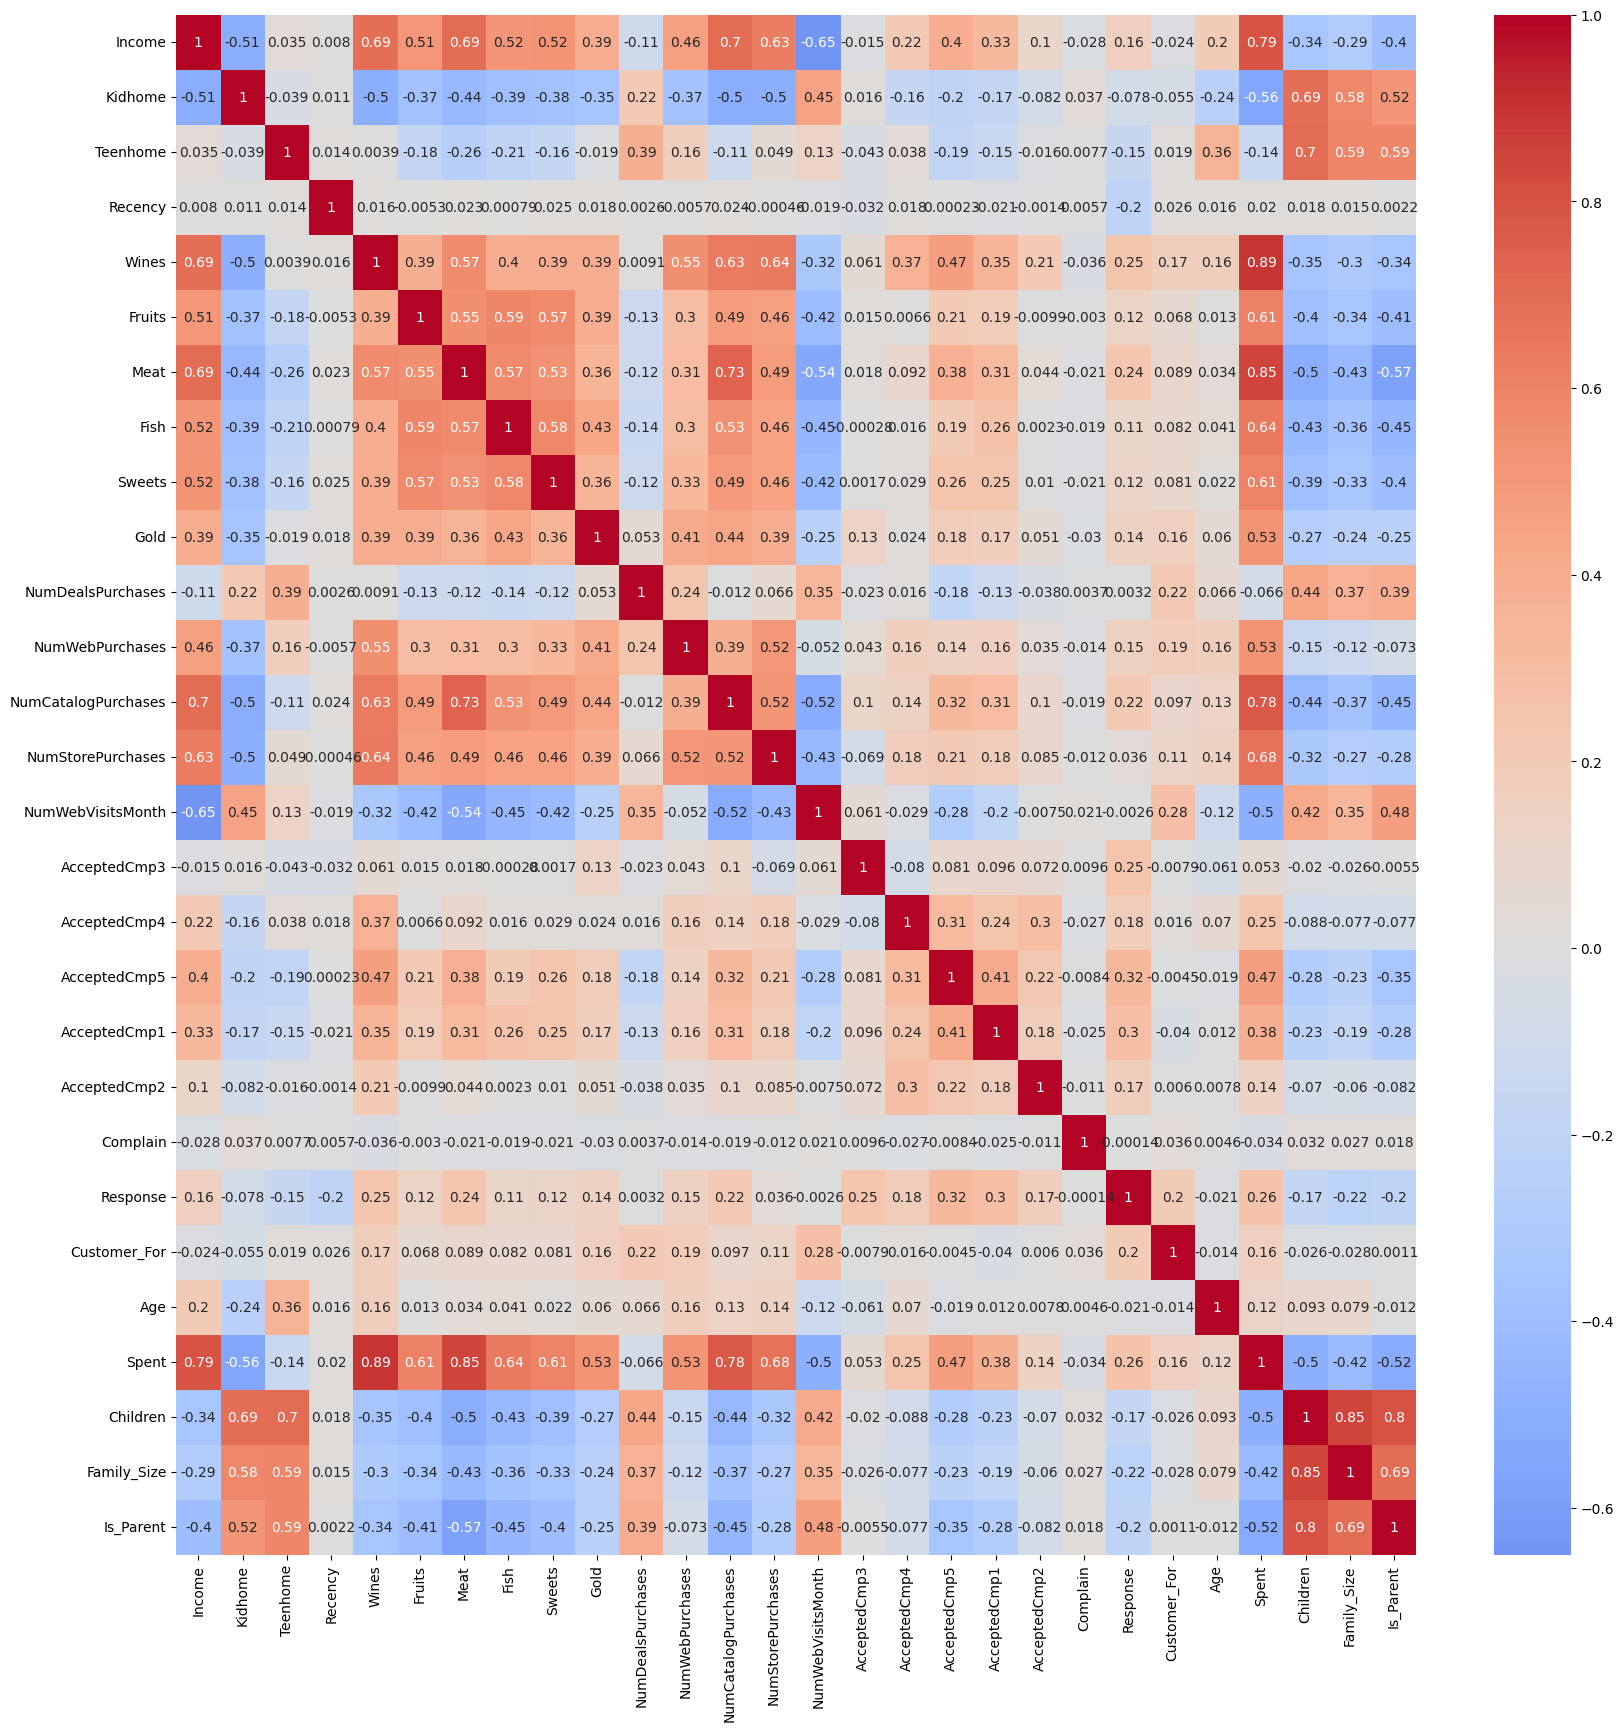

In [ ]:
#tạo biểu đồ hitmap ma trận tương quan để xem mối quan hệ giữa các biến số trong data
#hitmap chỉ vẽ các cột có giá trị là số, giá trị là chữu như cột Education, Marital_Status... sẽ ko vẽ được
cmap = "coolwarm"
corrmat= df_copy_clean.select_dtypes(include='number').corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
df_copy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [ ]:
df_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,663,68,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,113,71,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,312,60,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,139,41,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,161,44,422,Partner,1,3,1


In [ ]:
#Tìm danh sách các cột dạng string (object) để áp dụng Label Encoding ở dưới
s = (df_copy_clean.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
ds = df_copy_clean

# Xóa các cột chiến dịch
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

# Mã hóa các cột object. dùng LabelEncoder để mã hóa giá trị str thành số nguyên. VD: Married = 0
# Vì PCA chỉ làm việc với dữ liệu số
for col in ds.select_dtypes(include='object').columns:
    ds[col] = LabelEncoder().fit_transform(ds[col])

# Chuẩn hóa. đưa giá trị của từng cột về trung bình = 0, độ lệch chuẩn = 1
scaler = StandardScaler()
scaled_ds = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)

print("All features are now label-encoded and scaled.")

All features are now label-encoded and scaled.


In [ ]:
ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,663,68,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,113,71,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,312,60,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,139,41,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,161,44,422,1,1,3,1


In [ ]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [ ]:
LE=LabelEncoder()
for i in object_cols:
    df_copy_clean[i] = LE.fit_transform(df_copy_clean[i])

print("All features are now numerical")
print(object_cols)

All features are now numerical
['Education', 'Living_With']


In [ ]:
#Giảm chiều dữ liệu:
#Giảm chiều dữ liệu thành 3 chiều
pca = PCA(n_components=3)
#Tính toán PCA dựa trên dữ liệu đã chuẩn hóa
pca.fit(scaled_ds)
#Tạo 1 dataframe với 3 cột: col1,col2,col3
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
#.T xoay ngược hàng và cột cho dễ đọc
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,7.066881e-17,2.878602,-5.978124,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,3.212219e-17,1.709469,-4.194757,-1.323929,-0.173721,1.234851,6.168189
col3,2212.0,-1.525804e-17,1.231687,-3.625248,-0.853713,-0.050842,0.863974,6.750458


In [ ]:
PCA_ds.head()

,col1,col2,col3
0,4.986336,-0.161514,2.445404
1,-2.874168,0.022697,-1.530795
2,2.615763,-0.731421,-0.264422
3,-2.654568,-1.455878,-0.398370
4,-0.656015,0.177864,-0.141286


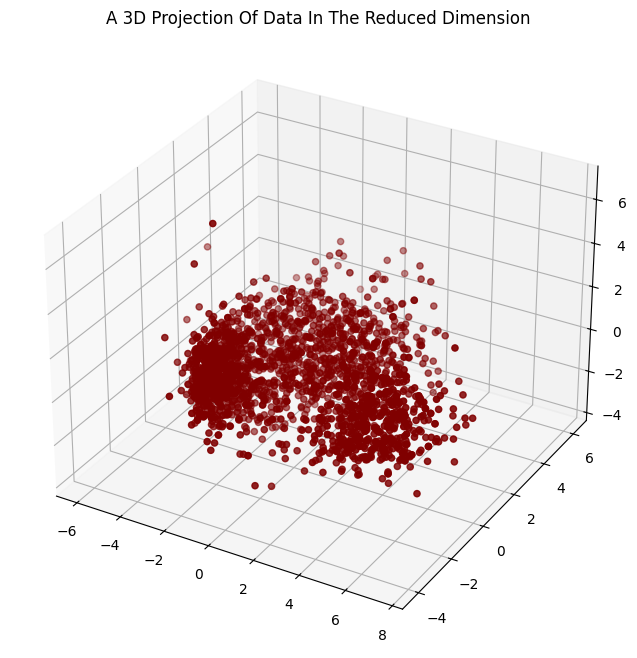

In [ ]:

x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
import numpy as np
import pandas as pd


class FeatureProcessor:
    def __init__(self, fixed_features=None):
        self.fixed_features = fixed_features


    # Feature extraction
    def pca(self, X: pd.DataFrame, top_k_components: int) -> pd.DataFrame:
        # Step 1: Tinh Covariance matrix
        # X là 1 dataframe với mỗi hàng là 1 mẫu (sample), mỗi cột là 1 đặc trưng (feature)
        # X.T (chuyển vị) biến mỗi hàng thành 1 đặc trưng để np.cov tính hiệp phương sai giữa các đặc trưng
        cov_matrix = np.cov(X.T)

        # Step 2: Tinh tri rieng (eugenvalue), vector rieng (eigen vector)
        # eigenvalues, eigenvectors là biến có thể thay đổi tên
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        #lưu trị riêng vào đối tượng để có thể sự dụng ở nơi khác ngoài PCA
        self.eigenvalues = eigenvalues

        # Step 3: Sap xep tri rieng
        # Không sắp xếp giá trị trực tiếp mà trả về index. Khi sắp xếp eigenvalues, bạn phải sắp xếp cả eigenvectors theo đúng thứ tự đó, vì thế phải sắp xếp chỉ số index
        # np.argsort(eigenvalues) sẽ trả về chỉ số (index) của eigenvalues theo thứ tự tăng dần
        # [::-1] đảo ngược mảng → ta có được chỉ số theo thứ tự giảm dần.
        idxs = np.argsort(eigenvalues)[::-1]
        # Dòng này sắp xếp lại trị riêng theo thứ tự giảm dần dựa trên chỉ số idxs
        eigenvalues = eigenvalues[idxs]
        # Dòng này sắp xếp các vector riêng tương ứng với thứ tự giảm dần của trị riêng. [:,...] là  chọn toàn bộ hàng trong ma trận
        eigenvectors = eigenvectors[:, idxs]

        # Step 4: Trich xuat pca vectors
        # : trước dấu phẩy: lấy tất cả các hàng (chiều ngang)
        # : sau dấu phẩy: lấy tất cả các cột từ 0 đến k-1 (chiều dọc). VD: k =2 lấy 2 cột đầu tiên
        self.pca_components = eige-nvectors[:, :top_k_components]

        # Step 5: Chieu data dau vao vao khong gian moi co so chieu nho hon (max variance)
        # chiếu dữ liệu ban đầu X vào các trục chính đã chọn trong self.pca_components
        # VD: a = np.array([1, 2, 3])
        # b = np.array([4, 5, 6])
        # result = np.dot(a, b)
        # print(result)  # ➜ 1*4 + 2*5 + 3*6 = 32
        X_pca = np.dot(X, self.pca_components)

        # Step 6: return du lieu sau khi PCA
        # PC: principle component
        col_names = [f"PC{i+1}" for i in range(top_k_components)]
        X_pca = pd.DataFrame(X_pca, columns=col_names, index=X.index)

        return X_pca


 Chỉ số tâm cụm được chọn: [855]
 Chỉ số tâm cụm được chọn: [ 855 1303]
 Chỉ số tâm cụm được chọn: [ 855 1303 1475]
 Chỉ số tâm cụm được chọn: [ 855 1303 1475  430]
 Chỉ số tâm cụm được chọn: [ 855 1303 1475  430 1268]
 Chỉ số tâm cụm được chọn: [ 855 1303 1475  430 1268 1413]


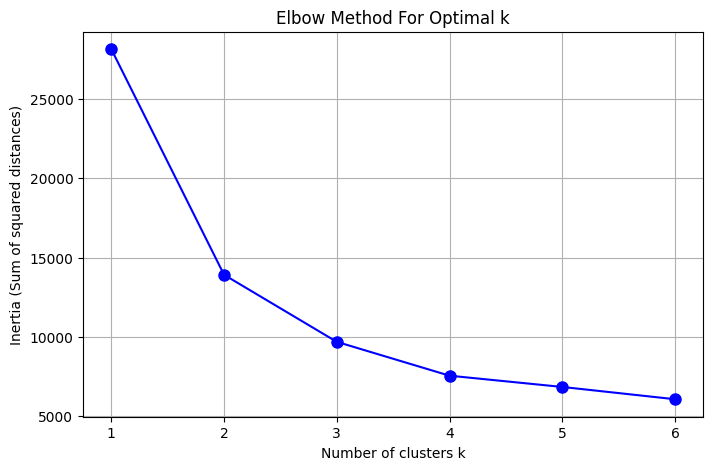

 Chỉ số tâm cụm được chọn: [ 855 1303 1475  430]
Cluster labels: [2 1 2 ... 2 0 1]
Centroids:
 [[ 0.86320925  1.94508001  0.36450674]
 [-2.57528159  0.75726824 -0.79790887]
 [ 4.18381759 -0.89089148 -0.19925687]
 [-2.02057362 -1.6842616   0.54332459]]


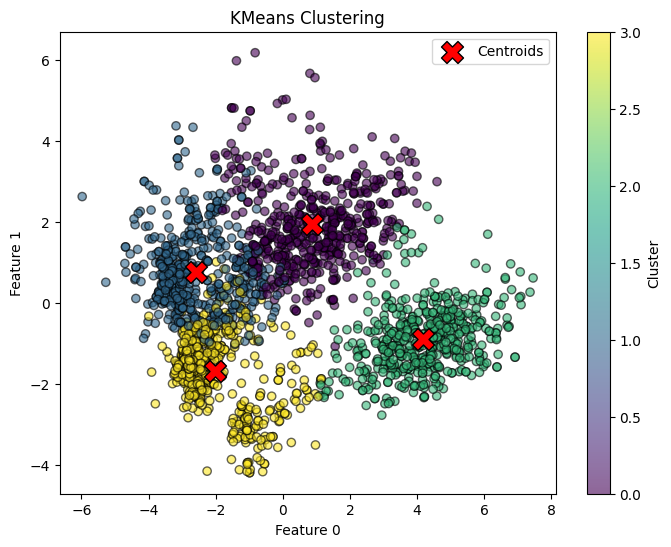

In [ ]:
class Kmean:
  def __init__(self, n_clusters=4, max_iter=100, tol=1e-4, random_state=None):
    self.n_clusters=n_clusters # số cụm cần phân
    self.max_iter = max_iter #số vòng lặp tối đa
    self.tol = tol # ngưỡng dừng lặp (sai số giữa các lân cập nhật tâm cụm)
    self.random_state = random_state #để tái lập kết quả
    self.centroids = None #lưu tạo độ tâm cụm
    self.labels_ = None #nhãn cụm của mỗi điểm
    self.inertia_ = None # tổng bình phương khoảng cách từ điểm đến tâm gần nhất
    #dấu gạch ngang ở dưới vì do quy ước đặt tên của scikit_learn
  # Khởi tạo ngẫu nhiên các tâm cụm từ dữ liệu đầu vào X
  def _initialize_centroids(self,X):
    if self.random_state is not None: #kiểm tra nếu người dùng đã truyền random_state lúc tạo đối tượng
      np.random.seed(self.random_state) #Nếu có random_state đặt seed cho bộ sinh số ngẫu nhiên của Numpy (để đã bảo mỗi lần chạy code, sẽ họn cùng 1 tâm cụm ban đầu)
    indices = np.random.choice(X.shape[0],self.n_clusters, replace=False)
    print(f" Chỉ số tâm cụm được chọn:", indices)
    return X[indices]

  #Mục đích: Gán mỗi điểm dữ liệu trong X vào tâm cụm gần nhất
  #X[:, np.newaxis]: cách dùng NumPy slicing để thêm 1 chiều mới vào mảng X
  #np.linalg.norm(..., axis=2): tính độ dài vector (Euclidean distance) theo trục axis=2, tức là qua mỗi cặp điểm–centroid.
  #labels = np.argmin(distances, axis=1): với mỗi hàng trong distance, lấy chỉ số giá trị nhỏ nhất (tức là gần tâm cụm nhất)
  def _assign_clusters(self, X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis =1)
    return labels

  #Mục đích: Tính lại tâm cụm (centroid) cho mỗi cụm k, bằng cách lấy trung bình tất cả các điểm thuộc về cụm đó.
  def _compute_centroids(self, X, labels):
    centroids = np.zeros((self.n_clusters, X.shape[1]))
    for k in range (self.n_clusters):
      members = X[labels == k]
      if len(members) > 0:
        centroids[k] = members.mean(axis=0)
      else:
        centroids[k] = X[np.random.choice(X.shape[0])]
    return centroids
  #Mục đích tìm ra tâm cụm(centroids) sao cho  mỗi điểm dữ liệu gán vào tâm cụm có khoảng cách nhỏ nhất
  def fit(self,X):
    if isinstance (X, pd.DataFrame):
      X = X.values

    self.centroids = self._initialize_centroids(X)
    for i in range(self.max_iter):
      labels = self._assign_clusters(X, self.centroids)
      new_centroids = self._compute_centroids(X,labels)

      centroid_shift = np.linalg.norm(self.centroids - new_centroids, axis =1).max()
      #Cập nhật lại tâm cụm trước khi kiểm tra điều kiện dừng
      self.centroids = new_centroids
      if centroid_shift < self.tol:
         break

    self.labels_ = self._assign_clusters(X, self.centroids)
    self.inertia_ = self._calculate_inertia(X, self.centroids, self.labels_)

    #Mục đích: dự đoán cụm. sau khi mô hình KMeans đã được huấn luyện bằng hàm fit.
  def predict(self, X):
      if isinstance(X, pd.DataFrame):
        X = X.values
      return self._assign_clusters(X,self.centroids)

    #Mục đích: tính tổng bình phương khoảng cách từ điểm dữ liệu tới tâm cụm
  def _calculate_inertia(self, X, centroids, labels):
    inertia = 0.0
    for k in range(self.n_clusters):
      members = X[labels == k]
      if len(members) > 0:
        inertia += ((members - centroids[k]) ** 2).sum()
    return inertia

    #Mục đích: tìm số lượng k tốt nhất cho dữ liệu bằng pp Elbow
  def elbow_method(self, X, max_k=10, plot=True):
        if isinstance(X, pd.DataFrame):
            X = X.values

        inertias = []
        for k in range(1, max_k + 1):
            km = Kmean(n_clusters=k, max_iter=self.max_iter, tol=self.tol, random_state=self.random_state)
            km.fit(X)
            inertias.append(km.inertia_)

        if plot:
            plt.figure(figsize=(8, 5))
            plt.plot(range(1, max_k + 1), inertias, 'bo-', markersize=8)
            plt.xlabel('Number of clusters k')
            plt.ylabel('Inertia (Sum of squared distances)')
            plt.title('Elbow Method For Optimal k')
            plt.grid(True)
            plt.show()

        return inertias

      #Mục đích: vẽ biểu đồ trực quan hóa phân cụm sau khi huấn luyện xong mô hình Kmean (fit xong)
  def plot_clusters(self, X, x_col=0, y_col=1, figsize=(8, 6), show_centroids=True, title='KMeans Clustering'):
        """
        Plot the clustered data points and centroids (if available).

        Args:
            X (pd.DataFrame or np.ndarray): Data to plot.
            x_col (int or str): Column index or name for x-axis.
            y_col (int or str): Column index or name for y-axis.
            figsize (tuple): Figure size.
            show_centroids (bool): Whether to plot centroids.
            title (str): Plot title.
        """
        if isinstance(X, pd.DataFrame):
            x_vals = X[x_col] if isinstance(x_col, str) else X.iloc[:, x_col]
            y_vals = X[y_col] if isinstance(y_col, str) else X.iloc[:, y_col]
        else:
            x_vals = X[:, x_col]
            y_vals = X[:, y_col]

        if self.labels_ is None:
            raise ValueError("Model has not been fitted yet. Call fit() before plotting.")

        plt.figure(figsize=figsize)
        scatter = plt.scatter(x_vals, y_vals, c=self.labels_, cmap='viridis', alpha=0.6, edgecolor='k')
        plt.xlabel(x_col if isinstance(x_col, str) else f'Feature {x_col}')
        plt.ylabel(y_col if isinstance(y_col, str) else f'Feature {y_col}')
        plt.title(title)
        plt.colorbar(scatter, label='Cluster')

        if show_centroids and self.centroids is not None:
            # Plot centroids
            if isinstance(X, pd.DataFrame):
                centroid_x = self.centroids[:, 0]
                centroid_y = self.centroids[:, 1]
            else:
                centroid_x = self.centroids[:, 0]
                centroid_y = self.centroids[:, 1]
            plt.scatter(centroid_x, centroid_y, s=250, c='red', marker='X', label='Centroids', edgecolor='k')
            plt.legend()

        plt.show()

# Example dataset (DataFrame) Mẫu dữ liệu
data_cluster = PCA_ds


# Initialize KMean with desired params. (Khởi tạo mô hình Kmeans)
kmean = Kmean(n_clusters=4, random_state=42,max_iter=200)

# Use elbow method to find optimal k (up to 6 clusters) (Dùng Elbow method để chọn số cụm tối ưu)
inertias = kmean.elbow_method(data_cluster, max_k=6)

# Fit model with chosen k Huấn luyện mô hình (fit)
kmean.fit(data_cluster)

# Cluster labels (In nhãn và tâm cụm)
print("Cluster labels:", kmean.labels_)

# Centroids (In nhãn và tâm cụm)
print("Centroids:\n", kmean.centroids)

# Plot clusters using the first two columns of data (Vẽ biểu đồ phân cụm)
kmean.plot_clusters(data_cluster, x_col=0, y_col=1)

data_cluster["CustomerGroup"] = labels
ds["CustomerGroup"] = labels


In [ ]:
#data_cluster = PCA_ds.copy()
#model = Kmean(n_clusters=4, random_state=42, max_iter=100)
# Train model
#model.fit(PCA_ds)
# Predict customer group
#labels = model.predict(data_cluster)
#Assign customer group
#Add thêm cột phân cụm vào data ds (data sau khi làm sạch)
data_cluster["CustomerGroup"] = labels
ds["CustomerGroup"] = labels

In [ ]:
#Tải data csv về máy tính
PCA_ds.to_csv('PCA_ds.csv', index=False)
from google.colab import files
files.download("PCA_ds.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Tải data PCA giảm chiều số liệu
PCA_ds.to_csv('data_cluster.csv', index=False)
from google.colab import files
files.download("data_cluster.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Tải data clean ds
ds.to_csv('ds.csv', index=False)
from google.colab import files
files.download("ds.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Tải data df_copy
df_copy.to_csv('df_copy.csv', index=False)
from google.colab import files
files.download("df_copy.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>